In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Load the newly uploaded survey data
file_path = "survey_filled_form_synthetic.xlsx"
df_survey = pd.read_excel(file_path, sheet_name="CHW eCHIS")

# Normalize column names by stripping spaces
df_survey.columns = df_survey.columns.str.strip()

# Display the first few rows to check the structure
df_survey.head()

,_submission_time,Amazina y'ufata amakuru,Igitsina,Ikigonderabuzima,Umudugudu,1.7 Ese gukoresha eCHIS byagufashije gutanga/kubona amakuru yukuri?,"1.13 Niba ari yego, ni izihe mbogamizi cyangwa ibibazo uhura nabyo cyane?","2.4 Niba ari Yego, ni kangahe ukoresha amakuru uhabwa n'imbonerahamwe mu gufata ibyemezo?",3.3Ese waba uhura n’ imbogamizi mu gusaba no kugenzura ububiko bw’ imiti?,4.2 Niba ari yego Ese amahugurwa wabonye kuri eCHIS yakunyuze ku ruhe rugero,5.5 Ese eCHIS yongereye ubumenyi bwo gukoresha ikoranabuhanga mu bajyanama b’ ubuzima b'abagore?
0,2025-02-16 09:48:13.821,Eric Habimana,Gore,Kigali Health Center,Village A,Oya,Ibindi,Buri cyumweru,Oya,Byiza cyane,Oya
1,2025-02-15 09:48:13.821,Alice Uwimana,Gabo,Kigali Health Center,Village D,Oya,Ibindi,Buri cyumweru,Yego,Ntakibazo,Cyane
2,2025-02-25 09:48:13.821,Alice Uwimana,Gabo,Kigali Health Center,Village B,Oya,Ibindi,Rimwe na rimwe,Yego,Byiza cyane,Ntacyo
3,2025-02-22 09:48:13.821,Eric Habimana,Gabo,Kigali Health Center,Village C,Yego,Ibibazo bya mudasobwa,Buri cyumweru,Yego,Byiza cyane,Oya
4,2025-03-16 09:48:13.821,Alice Uwimana,Gabo,Kigali Health Center,Village B,Oya,Kugenda gake,Rimwe na rimwe,Yego,Bibi cyane,Bikabije


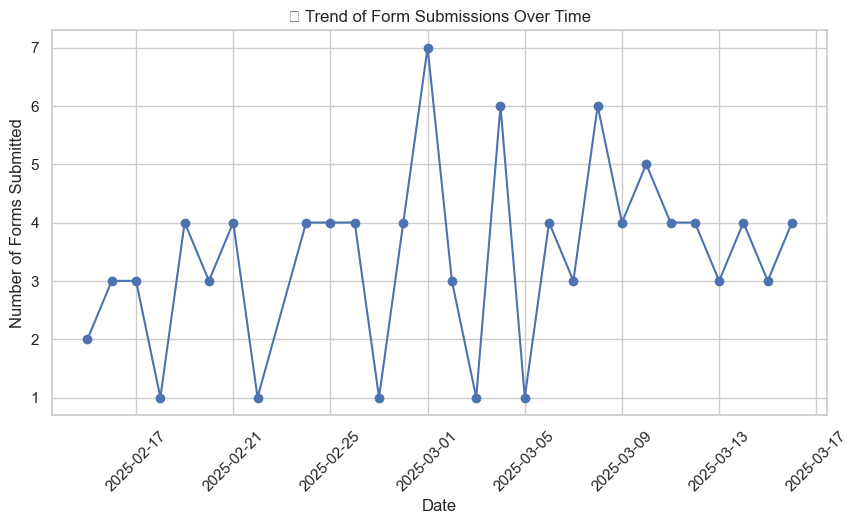

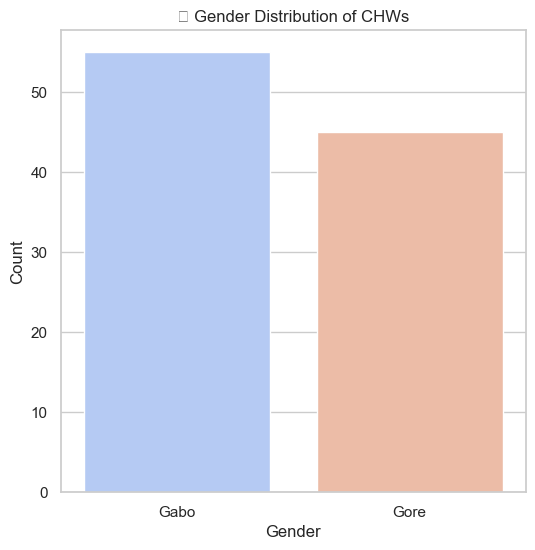

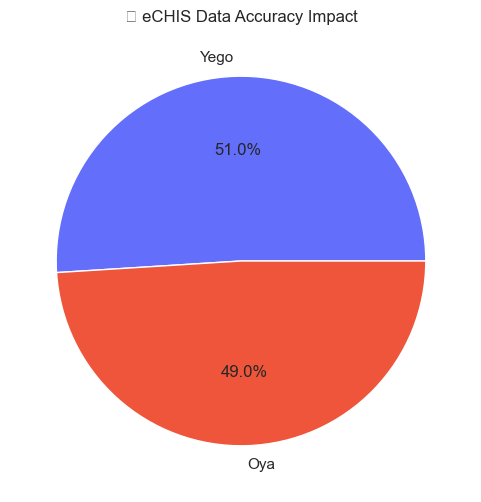

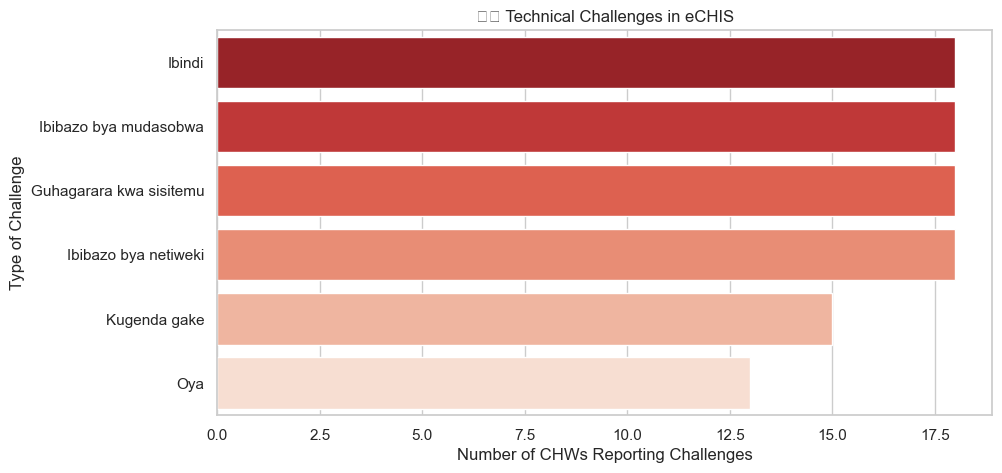

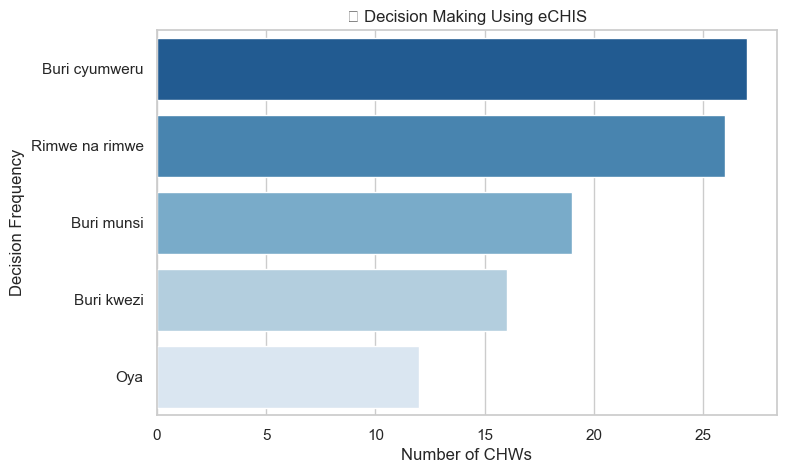

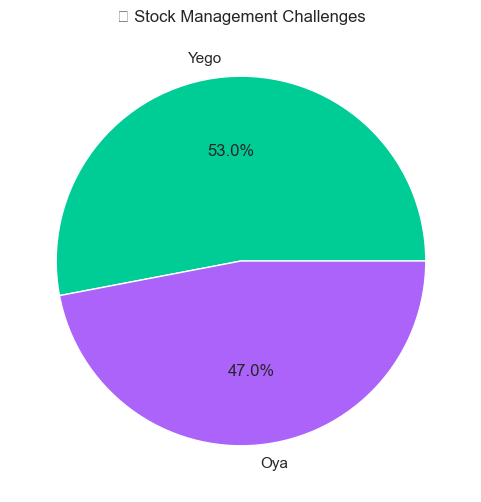

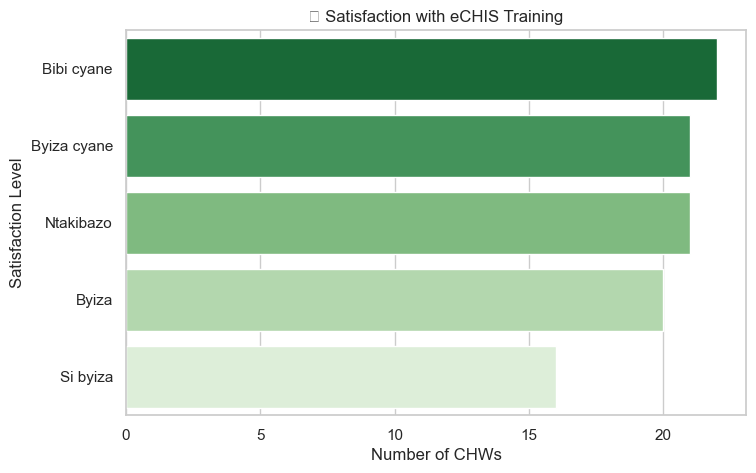

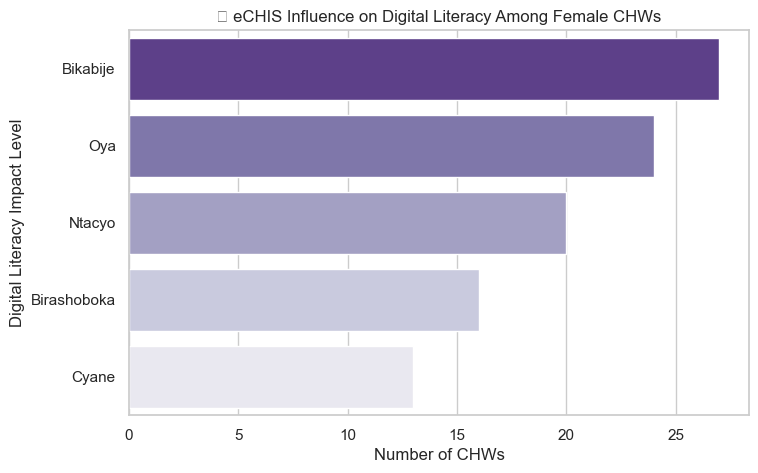

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plot style
sns.set(style="whitegrid")

# 📊 1. Total Forms Submitted Over Time (Trend Line)
plt.figure(figsize=(10, 5))
df_survey.groupby(df_survey['_submission_time'].dt.date).size().plot(kind='line', marker='o', color='b')
plt.title("📈 Trend of Form Submissions Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Forms Submitted")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 📊 2. Gender Distribution (Bar Chart)
plt.figure(figsize=(6, 6))
gender_counts = df_survey['Igitsina'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="coolwarm")
plt.title("🏥 Gender Distribution of CHWs")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# 📊 3. eCHIS Data Accuracy Impact (Yes/No Pie Chart)
data_accuracy_col = '1.7  Ese gukoresha eCHIS byagufashije gutanga/kubona amakuru yukuri?'
if data_accuracy_col in df_survey.columns:
    plt.figure(figsize=(6, 6))
    df_survey[data_accuracy_col].value_counts().plot.pie(autopct='%1.1f%%', colors=['#636EFA', '#EF553B'])
    plt.title("✅ eCHIS Data Accuracy Impact")
    plt.ylabel('')
    plt.show()

# 📊 4. Technical Challenges (Bar Chart)
tech_challenges_col = '1.13 Niba ari yego, ni izihe mbogamizi cyangwa ibibazo uhura nabyo cyane?'
if tech_challenges_col in df_survey.columns:
    plt.figure(figsize=(10, 5))
    challenge_counts = df_survey[tech_challenges_col].value_counts()
    sns.barplot(y=challenge_counts.index, x=challenge_counts.values, palette="Reds_r")
    plt.title("⚠️ Technical Challenges in eCHIS")
    plt.xlabel("Number of CHWs Reporting Challenges")
    plt.ylabel("Type of Challenge")
    plt.show()

# 📊 5. Decision Making Frequency (Bar Chart)
decision_col = "2.4 Niba ari Yego, ni kangahe ukoresha amakuru uhabwa n'imbonerahamwe mu gufata ibyemezo?"
if decision_col in df_survey.columns:
    plt.figure(figsize=(8, 5))
    decision_counts = df_survey[decision_col].value_counts()
    sns.barplot(y=decision_counts.index, x=decision_counts.values, palette="Blues_r")
    plt.title("📊 Decision Making Using eCHIS")
    plt.xlabel("Number of CHWs")
    plt.ylabel("Decision Frequency")
    plt.show()

# 📊 6. Stock Management Challenges (Pie Chart)
stock_challenges_col = "3.3Ese waba uhura n’ imbogamizi mu gusaba no kugenzura ububiko bw’ imiti?"
if stock_challenges_col in df_survey.columns:
    plt.figure(figsize=(6, 6))
    df_survey[stock_challenges_col].value_counts().plot.pie(autopct='%1.1f%%', colors=["#00CC96", "#AB63FA"])
    plt.title("💊 Stock Management Challenges")
    plt.ylabel('')
    plt.show()

# 📊 7. Satisfaction with Training (Bar Chart)
satisfaction_col = "4.2 Niba ari yego Ese amahugurwa wabonye kuri eCHIS yakunyuze ku ruhe rugero"
if satisfaction_col in df_survey.columns:
    plt.figure(figsize=(8, 5))
    satisfaction_counts = df_survey[satisfaction_col].value_counts()
    sns.barplot(y=satisfaction_counts.index, x=satisfaction_counts.values, palette="Greens_r")
    plt.title("🎓 Satisfaction with eCHIS Training")
    plt.xlabel("Number of CHWs")
    plt.ylabel("Satisfaction Level")
    plt.show()

# 📊 8. eCHIS Influence on Digital Literacy (Bar Chart)
digital_lit_col = "5.5 Ese eCHIS yongereye ubumenyi bwo gukoresha ikoranabuhanga mu bajyanama b’ ubuzima b'abagore?"
if digital_lit_col in df_survey.columns:
    plt.figure(figsize=(8, 5))
    digital_lit_counts = df_survey[digital_lit_col].value_counts()
    sns.barplot(y=digital_lit_counts.index, x=digital_lit_counts.values, palette="Purples_r")
    plt.title("📱 eCHIS Influence on Digital Literacy Among Female CHWs")
    plt.xlabel("Number of CHWs")
    plt.ylabel("Digital Literacy Impact Level")
    plt.show()